In [1]:
#LINEAR REGRESSION

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load data from CSV file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/city_day_cleaned.csv")

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define X and y
X = df[['PM2.5', 'PM10']]
y = df['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Create and fit the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict the AQI values using the model
y_pred = linreg.predict(X_test)

# Create a DataFrame to store the test data and predictions
df_test = X_test.copy()
df_test['Date'] = df.iloc[X_test.index]['Date']  # Adding 'Date' column from original data
df_test['Observed_AQI'] = y_test
df_test['Predicted_linear'] = y_pred

# Reorder columns to have 'Date' at the beginning
df_test = df_test[['Date', 'PM2.5', 'PM10', 'Observed_AQI', 'Predicted_linear']]

# Save the Linear Regression results (date, observed values, predicted values) to a CSV file
df_test.to_csv("C:/Users/pc/Desktop/PROJECT/city linear  pred.csv", index=False)


In [3]:
linreg.coef_

array([-0.04054376,  1.69636552])

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

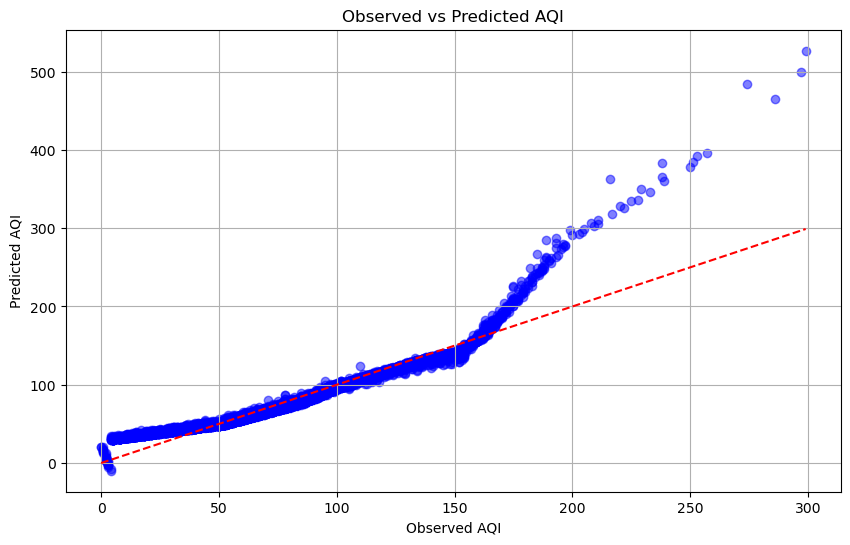

Mean absolute error: 6.481182147717837
Root Mean Square Error: 10.399415055716839
R-squared: 0.9214299782724545


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Load data from CSV file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/city_day_cleaned.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define X and y
X = df[['PM2.5', 'PM10']]
y = df['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Standardize the features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Initialize and fit Linear Regression model
linear_model = LinearRegression()
linear_model.fit(scaled_X_train, y_train)

# Predict the AQI values
ypred = linear_model.predict(scaled_X_test)

# Ensure y_test and ypred have the same length
assert len(y_test) == len(ypred), "y_test and ypred have different lengths"

# Plotting observed vs predicted values using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ypred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of perfect prediction
plt.xlabel('Observed AQI')
plt.ylabel('Predicted AQI')
plt.title('Observed vs Predicted AQI')
plt.grid(True)
plt.show()

# Calculate and print regression metrics
print('Mean absolute error: {}'.format(mean_absolute_error(y_test, ypred)))
print('Root Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, ypred))))
print('R-squared: {}'.format(r2_score(y_test, ypred)))

# Create a DataFrame to store the test data and predictions
df_test = X_test.copy()
df_test['Date'] = df.iloc[X_test.index]['Date']  # Adding 'Date' column from original data
df_test['Observed_AQI'] = y_test
df_test['Predicted_LR'] = ypred

# Save the Linear Regression results (date, observed values, predicted values) to a CSV file
df_test.to_csv("C:/Users/pc/Desktop/PROJECT/city linear  pred.csv", index=False)


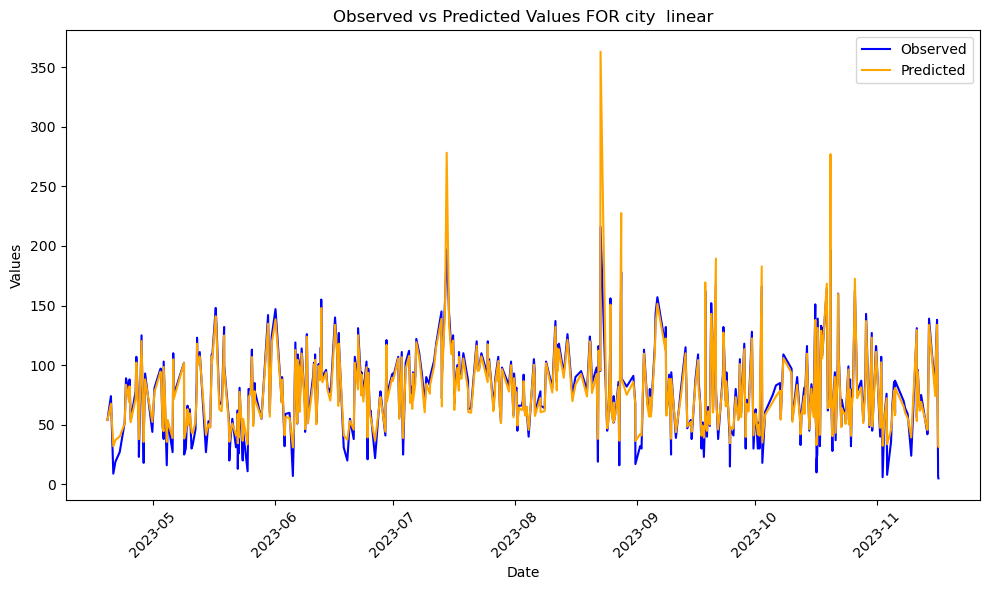

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/city linear  pred.csv")

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check if the dataset has the necessary columns
required_columns = ['Date', 'Observed_AQI', 'Predicted_LR']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Dataset must contain the following columns: {required_columns}")

# Select about 5% of the data for plotting
df_sample = df.sample(frac=0.03, random_state=42)

# Aggregate duplicate dates by averaging the values
df_sample = df_sample.groupby('Date').mean().reset_index()

# Sort the dataframe by date for plotting
df_sample = df_sample.sort_values('Date')

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot observed values
plt.plot(df_sample['Date'], df_sample['Observed_AQI'], label='Observed', color='blue')

# Plot predicted values
plt.plot(df_sample['Date'], df_sample['Predicted_LR'], label='Predicted', color='orange')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Observed vs Predicted Values FOR city  linear')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [10]:
#lasso

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Load data from CSV file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/city_day_cleaned.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define X and y
X = df[['PM2.5', 'PM10']]
y = df['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Create and fit the Lasso regression model
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

# Make predictions using the Lasso model
y_pred_lasso = model.predict(X_test)

# Create a DataFrame to store the test data and predictions
df_test = X_test.copy()
df_test['Date'] = df.iloc[X_test.index]['Date']  # Adding 'Date' column from original data
df_test['Observed_AQI'] = y_test
df_test['Predicted_lasso'] = y_pred_lasso

# Save the Lasso results (date, observed values, predicted values) to a CSV file
df_test.to_csv("C:/Users/pc/Desktop/PROJECT/city pred LASSO.csv", index=False)


In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
pred = model.predict(X_train)

print('Mean absolute error: {}'.format(mean_absolute_error((y_train), (pred))))
print('Root mean square error: {}'.format(np.sqrt(mean_squared_error((y_train), (pred)))))
print('R-squared: {}'.format(r2_score((y_train), (pred))))


Mean absolute error: 6.466608151924049
Root mean square error: 10.62460731964028
R-squared: 0.9179293980839927


In [13]:
#Ridge

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

from sklearn.linear_model import Ridge
# Load data from CSV file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/city_day_cleaned.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define X and y
X = df[['PM2.5', 'PM10']]
y = df['AQI']

model = Ridge(alpha = 1)
model.fit(X_train, y_train)

Ridge(alpha=1)
# Create a DataFrame to store the test data and predictions
df_test = X_test.copy()
df_test['Date'] = df.iloc[X_test.index]['Date']  # Adding 'Date' column from original data
df_test['Observed_AQI'] = y_test
df_test['Predicted_lasso'] = y_pred_lasso

# Save the Lasso results (date, observed values, predicted values) to a CSV file
df_test.to_csv("C:/Users/pc/Desktop/PROJECT/city pred RIDGE.csv", index=False)


In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
pred = model.predict(X_train)

print('Mean absolute error: {}'.format(mean_absolute_error((y_train), (pred))))
print('Root mean square error: {}'.format(np.sqrt(mean_squared_error((y_train), (pred)))))
print('R-squared: {}'.format(r2_score((y_train), (pred))))

Mean absolute error: 6.465209184500122
Root mean square error: 10.624604988674424
R-squared: 0.9179294340954413


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mean absolute error: 0.5725638215198258
Root Mean Square Error: 2.516165830815793
R-squared: 0.9954004264245455


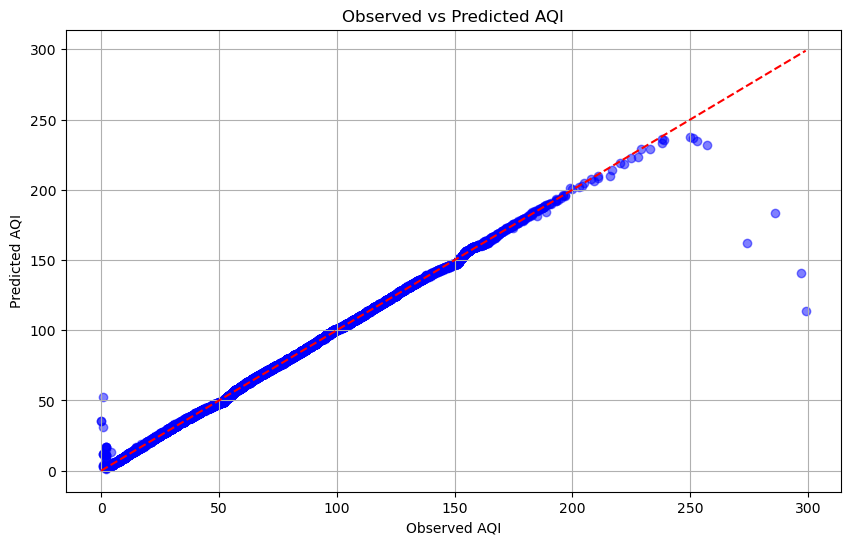

In [17]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data from CSV file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/city_day_cleaned.csv")

# Convert 'DATE' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define X and y
X = df[['PM2.5', 'PM10']]
y = df['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Standardize the features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize SVR and RandomizedSearchCV
svr = SVR()
random_search = RandomizedSearchCV(svr, param_distributions=param_distributions, n_iter=10, cv=3, n_jobs=-1, verbose=2,
                                   random_state=101)

# Fit RandomizedSearchCV to find the best hyperparameters
random_search.fit(scaled_X_train, y_train)

# Predict using the best estimator found by RandomizedSearchCV
y_pred = random_search.best_estimator_.predict(scaled_X_test)

# Calculate and print regression metrics
print('Mean absolute error: {}'.format(mean_absolute_error(y_test, y_pred)))
print('Root Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R-squared: {}'.format(r2_score(y_test, y_pred)))

# Plotting observed vs predicted values using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of perfect prediction
plt.xlabel('Observed AQI')
plt.ylabel('Predicted AQI')
plt.title('Observed vs Predicted AQI')
plt.grid(True)
plt.show()

# Create a DataFrame to store the test data and predictions
df_test = X_test.copy()
df_test['Date'] = df.iloc[X_test.index]['Date']  # Adding 'Date' column from original data
df_test['Observed_AQI'] = y_test
df_test['Predicted_SVR'] = y_pred

# Save the SVR results (date, observed values, predicted values) to a CSV file
df_test.to_csv("C:/Users/pc/Desktop/PROJECT/city svr_predictions.csv", index=False)


Mean Absolute Error: 0.0060681411403733
Root Mean Square Error: 0.07357280098130138
R-squared: 0.999996067455641


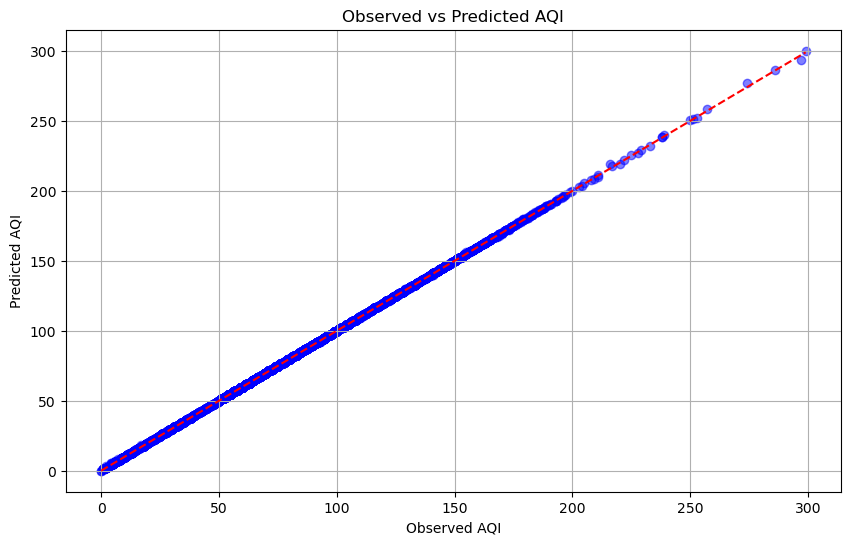

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/city_day_cleaned.csv")

# Convert 'Date' column to datetime format (if necessary)
df['Date'] = pd.to_datetime(df['Date'])

# Define X and y
X = df[['PM2.5', 'PM10']]
y = df['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Standardize the features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Initialize RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=101)

# Fit the model to the training data
rfr.fit(scaled_X_train, y_train)

# Predict using the model
y_pred = rfr.predict(scaled_X_test)

# Calculate and print regression metrics
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, y_pred)))
print('Root Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R-squared: {}'.format(r2_score(y_test, y_pred)))

# Plotting observed vs predicted values using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of perfect prediction
plt.xlabel('Observed AQI')
plt.ylabel('Predicted AQI')
plt.title('Observed vs Predicted AQI')
plt.grid(True)
plt.show()

# Create a DataFrame to store the test data and predictions
df_test = X_test.copy()
df_test['Date'] = df.iloc[X_test.index]['Date']  # Adding 'Date' column from original data
df_test['Observed_AQI'] = y_test
df_test['Predicted_RFR'] = y_pred

# Save the RFR results (date, observed values, predicted values) to a CSV file
df_test.to_csv("C:/Users/pc/Desktop/PROJECT/city rfr_predictions.csv", index=False)


0:	learn: 33.6422186	total: 164ms	remaining: 2m 43s
100:	learn: 1.5196999	total: 956ms	remaining: 8.51s
200:	learn: 1.3093440	total: 1.76s	remaining: 7s
300:	learn: 1.2401747	total: 2.54s	remaining: 5.91s
400:	learn: 1.2110691	total: 3.33s	remaining: 4.98s
500:	learn: 1.1969642	total: 4.11s	remaining: 4.09s
600:	learn: 1.1895705	total: 4.92s	remaining: 3.27s
700:	learn: 1.1855457	total: 5.71s	remaining: 2.43s
800:	learn: 1.1832082	total: 6.5s	remaining: 1.61s
900:	learn: 1.1817046	total: 7.28s	remaining: 800ms
999:	learn: 1.1807620	total: 8.06s	remaining: 0us
Mean Absolute Error: 0.2787015087790437
Root Mean Square Error: 1.0418064247164325
R-squared: 0.9992114792756176


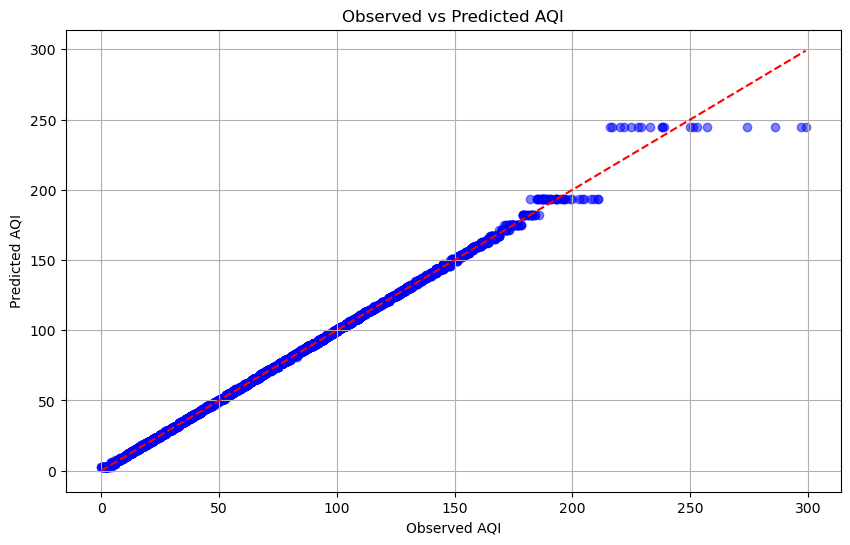

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/city_day_cleaned.csv")

# Convert 'Date' column to datetime format (if necessary)
df['Date'] = pd.to_datetime(df['Date'])

# Define X and y
X = df[['PM2.5', 'PM10']]
y = df['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Standardize the features (if necessary)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Initialize CatBoostRegressor
cbr = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, random_state=101, verbose=100)

# Train the model
cbr.fit(scaled_X_train, y_train)

# Predict using the trained model
y_pred = cbr.predict(scaled_X_test)

# Calculate and print regression metrics
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, y_pred)))
print('Root Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R-squared: {}'.format(r2_score(y_test, y_pred)))

# Plotting observed vs predicted values using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of perfect prediction
plt.xlabel('Observed AQI')
plt.ylabel('Predicted AQI')
plt.title('Observed vs Predicted AQI')
plt.grid(True)
plt.show()

# Create a DataFrame to store the test data and predictions
df_test = X_test.copy()
df_test['Date'] = df.iloc[X_test.index]['Date']  # Adding 'Date' column from original data
df_test['Observed_AQI'] = y_test
df_test['Predicted_CBR'] = y_pred

# Save the CBR results (date, observed values, predicted values) to a CSV file
df_test.to_csv("C:/Users/pc/Desktop/PROJECT/city cbr_predictions.csv", index=False)
